# Доверительные интервалы 

## Задача 1

Рассмотрим следующие ситуации:

1. Выборка из распределения $\mathcal{N}(0, 1)$; точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$.

2. Выборка из распределения $U[0, 1]$; точный доверительный интервал минимальной длины в параметрической модели $U[0, \theta]$ на основе статистики $X_{(n)}$.

Для каждой ситуации из перечисленных выше сгенерируйте выборку $X_1, ... X_{100}$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок вида $X_1, ... X_i$, $1 \le i \le 100$.

Постройте графики зависимости верхних и нижних границ интервала от размера выборки, используя написанную функцию. Нужно нанести на график точки выборки.
Для вычисления квантилей у каждого распределения из `scipy.stats` используйте функцию `ppf`.

### 1. Рассмотрим нормальное распределение

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:
alpha = 0.95
size_sample = 100
theta = 1
norm = sps.norm(loc = 0,scale = theta)
sample_norm = norm.rvs(size = size_sample,random_state = 42)

$\theta$ из $\mathcal{N}(\theta, 1)$ это $(\overline{X} - z_{\frac{1 + \alpha}{2}} \frac{1}{\sqrt{n}}, \overline{X} + z_{\frac{1 + \alpha}{2}} \frac{1}{\sqrt{n}})$ 

In [18]:
sample_norm_mean = sample_norm.cumsum() / np.arange(1, size_sample + 1)
left_norm = sample_norm_mean - sps.norm.ppf((1 + alpha)/2)/(np.arange(1,101))**0.5
right_norm = sample_norm_mean + sps.norm.ppf((1 + alpha)/2)/(np.arange(1,101))**0.5

In [19]:
def draw_confidence_interval(
        left,  # левая граница интервала
        right,  # правая граница интервала
        estimation=None,  # если задана, то рисуется график оценки
        sample=None,  # если задано, то рисуются точки выборки
        ylim=(None, None),  # ограничение по оси y
        estimation_label=None,
        confidence_label=None
    ):
    
    time = np.arange(1, len(left) + 1)
    
    if sample is not None:
        plt.scatter(time, sample, alpha=0.3, 
                    s=40, label='sample')  # s - размер точек
        
    if estimation is not None:
        plt.plot(time, estimation, linewidth=2.5, 
                 label=estimation_label)  
        # linewidth - толщина линии
        
    plt.fill_between(time, right, left, alpha=0.2, label=confidence_label)
    
    plt.legend(prop={'size':16})
    plt.xlim((1, len(left)))
    plt.ylim(ylim)
    plt.xlabel('Sample size', fontsize=16)

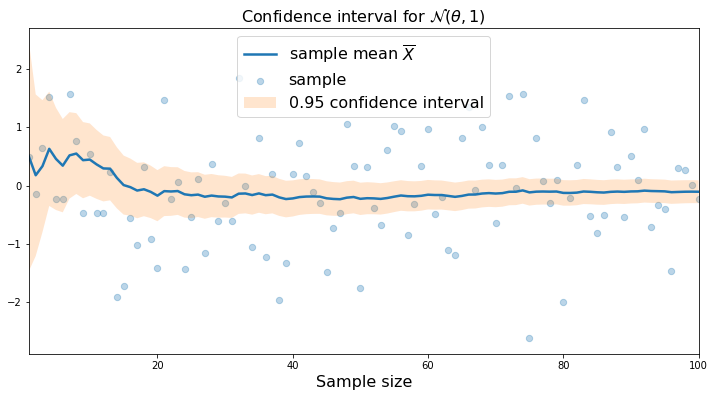

In [20]:
plt.figure(figsize = (12,6))
draw_confidence_interval(left_norm, right_norm, sample_norm_mean, 
    sample_norm, estimation_label='sample mean $\overline{X}$', 
    confidence_label='0.95 confidence interval')
plt.title(r'Confidence interval for $\mathcal{N}(\theta, 1)$', 
          fontsize=16) 
plt.show()

### 2. Равномерное распределение

In [37]:
sample_size = 100
theta = 1
uniform = sps.uniform(loc = 0,scale = theta)
sample_uniform = uniform.rvs(size = sample_size,random_state = 42)
sample_uniform_max = np.maximum.accumulate(sample_uniform)
left_uniform = sample_uniform_max
right_uniform = sample_uniform_max / (1 - alpha) ** 1/np.arange(1,sample_size + 1)

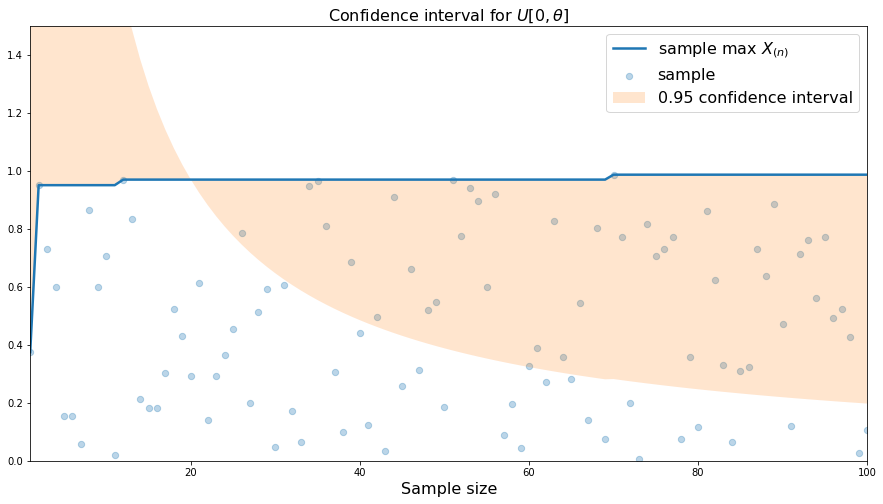

In [38]:
plt.figure(figsize=(15, 8))
draw_confidence_interval(left_uniform, right_uniform, 
    estimation=sample_uniform_max, estimation_label=
    r'sample max $X_{(n)}$', sample=sample_uniform, ylim=(0, 1.5), 
    confidence_label='0.95 confidence interval')
plt.title(r'Confidence interval for $U[0, \theta]$', 
          fontsize=16) 
plt.show()